<a href="https://colab.research.google.com/github/2303A52453-Akshitha/2303A52453_AIML/blob/main/Aiml_Lab_Exam_2453.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Data and Preprocess

A.Akshitha

2303A52453

Batch - 42

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace with your own dataset path)
data = pd.read_csv("/credit.csv")

# Checking the first few rows
print(data.head())



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features (optional, but recommended for models like SVM and kNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


  checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67     

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Confusion Matrix and F1-Score
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")


Random Forest Accuracy: 0.7200
Random Forest Confusion Matrix:
[[174  35]
 [ 49  42]]
Random Forest F1 Score: 0.7129


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Confusion Matrix and F1-Score
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Decision Tree Confusion Matrix:\n{conf_matrix_dt}")
print(f"Decision Tree F1 Score: {f1_dt:.4f}")


Decision Tree Accuracy: 0.6233
Decision Tree Confusion Matrix:
[[156  53]
 [ 60  31]]
Decision Tree F1 Score: 0.6189


Feature Importance

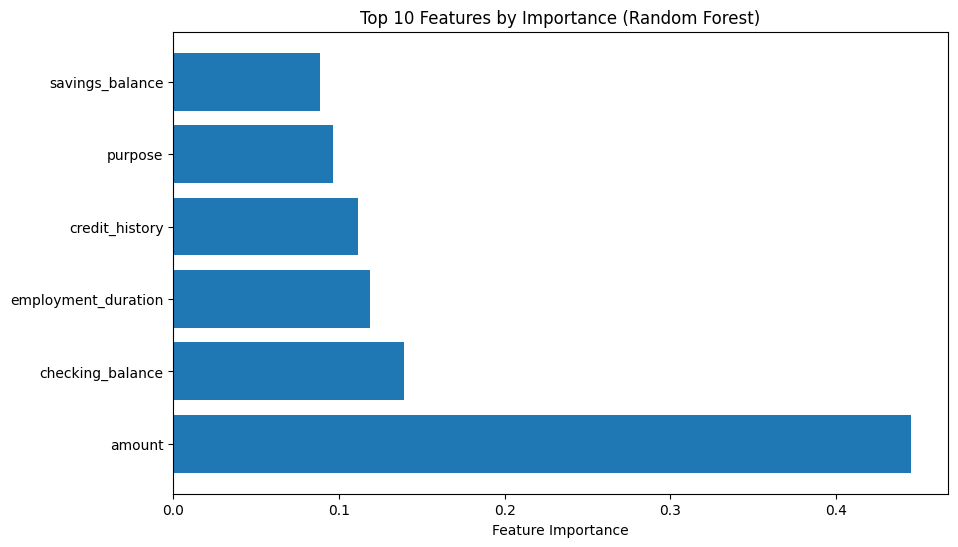

               Feature  Importance
3               amount    0.445213
0     checking_balance    0.139373
5  employment_duration    0.118694
1       credit_history    0.111812
2              purpose    0.096460
4      savings_balance    0.088448


In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to show feature importances
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'][:10], feature_df['Importance'][:10])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features by Importance (Random Forest)')
plt.show()

# Display the feature importance DataFrame
print(feature_df)


 Out-of-Bag (OOB) Error

In [ ]:
# OOB score (error)
oob_error = 1 - rf_model.oob_score_
print(f"Random Forest OOB Error: {oob_error:.4f}")


Random Forest OOB Error: 0.2686


compare Random Forest and Decision Tree

In [ ]:
# Compare Random Forest and Decision Tree accuracy
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")


Random Forest Accuracy: 0.7200
Decision Tree Accuracy: 0.6233
